## Alongshore Currents Generated by Oblique Internal Bores

A compelling analogy exists between the energy transformation/dissipation of internal bores and that of shoaling surface gravity waves. Becherer et al. 2021(b) recently developed a parameterization framework for the energetics of bores corresponding to classical scalings used for the surf zone. Generally, oceanographic research has focused on the mixing capacity of internal bores (Walter et al. 2012 JPO), but the analogy to surface waves invites the question of whether internal waves could drive mean flows via radiation stress gradients in the alongshore or cross-shore directions. Recent high-resolution observations of nonlinear internal bores reveal high alongshore variability in kinetic energy along a bore front as it interacts with topography and stratification (McSweeney et al. 2020 JPO). The cross-shore dissipation of bore energy is also (Becherer et al. 2021a Fig. 5a) is also substantial, with internal tide energy flux vanishing by the 25-m isobath. Here, back of the envelope arguments are made in order to assess the magnitude of alongshore mean currents driven by internal bores

Starting with the expression for energy flux divergence in the direction of bore propagation (x) provided in Becherer et al. 2021(b) (eqn. 11)

$$\frac{\partial F_E}{\partial x} = C_{Fx}\frac{2C_FC_A}{3\pi} \rho_0 <\overline{N^2}>^{3/2}H^3 \frac{\partial H}{\partial x} \tag{1} $$

where 

$$C_{Fx} = 1 + \frac{3}{8}\frac{H}{<\overline{N^2}>}\frac{\partial <\overline{N^2}>}{\partial x} $$

is a coefficient that accounts for spatially varying stratification, but $C_{Fx} \approx 1$ is assumed here.

$C_A \approx 0.1 $ is the product of 
- ratio of depth-integrated APE to the the maximum possible APE - a measure of energy saturation that averages 0.27 for the Point Sal measurements
- the shape factor of the internal tide, a mean of 0.26 at Point Sal.

$C_F$ is a proportionality factor modulating how APE is related to the baroclinic energy flux, and although known to vary with depth and slope, is assumed to be $\approx 1.0 $ here. The bore depth ($H = 50m$), slope ($dh/dx = 0.001$), and stratification ($<\overline{N^2}> \approx 1.5e-4s^{-2}$) are values characteristic of the region.

We can now relate the energy flux divergence to the radiation stress, (specifically the shoreward flux of alongshore momentum) invoking Snell's law and conservation of momentum, following Longuet-Higgins 1970 (eqn. 30)

$$\tau_y = -\frac{\partial S_{xy}}{\partial x}  = 
\frac{\partial F_E}{\partial x} \frac{\sin{\theta}}{c_0} $$

where $\theta$ is the angle between the bottom slope and the wave and $c_0$, the phase speed, can be approximated as a linear internal wave propagating through constant stratification (Becherer et al. 2021b)

$$ c_0 = \frac{1}{\pi}<\overline{N^2}>^{1/2} H$$

To proceed we assume the radiation stress gradient is balanced by the alongshore bottom friction ($F_b \sim\frac{\tau_y}{\rho_0}$)

$$F_b = \tau c_b <uv> $$

where $c_b$ is a friction coefficient and the brackets ($<>$) indicate phase averaging. Ater decomposing the velocity into mean and fluctuating components and assuming the cross-shore orbital velocity is much larger than the mean alongshore flow ($u_0>>\overline{v}$), no mean cross-shore flow, and a small wave angle, the above can be restated as

$$F_b = \rho_0 c_b \frac{2}{\pi}u_0\overline{v}$$

where $u_0$ is the orbital velocity and $\overline{v}$ the mean alongshore flow. After assuming $u_0 \approx 0.25 m/s$ (Sweeney et al. 2021 Figure 3), and $c_b \approx 0.01$ (Longuet-Higgins 1970) $\overline{v}$ can be estimated.

$$ \overline{v} = C_{Fx}C_FC_A <\overline{N^2}>H^2 \frac{\partial H}{\partial x} \frac{\sin{\theta}}{c_b u_0}\frac{\pi}{3} \tag{1} $$

Next, we examine predicted values for $\overline{v}$ give an array of realistic conditions

In [108]:
def speed(H = 30, θ = 30*np.pi/180, u0 = 0.25, cb = 0.01, dhdx = 0.001, N2 = 1.5e-4, 
          cfx = 1, cf = 1.0, ca = 0.1):
    return cfx*cf*ca*N2*H**2*dhdx*np.sin(θ)*(np.pi/3)/(cb*u0)

In [163]:
import pandas as pd
import seaborn as sns

n = 25
angles = np.linspace(0, np.pi*30/180, n) #Sample incident wave angle 0-30 degrees
depths = np.linspace(20, 200, n) #Sample bore depths, 20-200m, roughly covering Becherer et al. 2021b

D = { (float(d), float(angle*180/np.pi)):speed(H = d, θ = angle) for angle in angles for d in depths}
df = pd.Series(D).unstack().transpose()

colunits = " m"
rowunits = "^{{\circ}}"
for f in df.index:
    df.rename(index = {f: f"${int(f)}$ ${rowunits}$"}, inplace = True )
for f in df.columns:
    df.rename(columns = {f: f"${abs(int(f))} {colunits}$"} , inplace =  True)

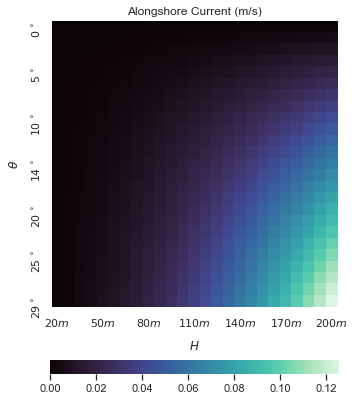

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
cbar_kwa = dict(orientation = "horizontal", pad = .15, fraction = 0.041)
heatmap_kws = dict(square = True, linewidths = 0, cbar_kws = cbar_kwa, 
                   xticklabels = int(n/6), yticklabels = int(n/6))


fig,ax= plt.subplots(1,figsize = (5.5,6.5))
pw = sns.heatmap(df, cmap = "mako",  **heatmap_kws)
pw.set_title("Alongshore Current (m/s)")
ax.set_xlabel(r"$H$", labelpad = 10)
ax.set_ylabel(r"$\theta$", labelpad = 10)
fig.savefig("output.png")

Incident angle and bore depth were varied while all other variables were held constant. We see that for increasing bore depths and incident wave angle  predicted alongshore flows can reach several cm/s, which is non-trivial in the coastal ocean. 

### References

- Becherer, J., Moum, J. N., Calantoni, J., Colosi, J. A., Barth, J. A., Lerczak, J. A., McSweeney, J. M., MacKinnon, J. A., & Waterhouse, A. F. (2021). Saturation of the Internal Tide over the Inner Continental Shelf. Part I: Observations, Journal of Physical Oceanography, 51(8), 2553-2563. Retrieved Sep 28, 2021

- Becherer, J., Moum, J. N., Calantoni, J., Colosi, J. A., Barth, J. A., Lerczak, J. A., McSweeney, J. M., MacKinnon, J. A., & Waterhouse, A. F. (2021). Saturation of the Internal Tide over the Inner Continental Shelf. Part II: Parameterization, Journal of Physical Oceanography, 51(8), 2565-2582.

- Longuet-Higgins, M. S. (1970), Longshore currents generated by obliquely incident sea waves: 1, J. Geophys. Res., 75( 33), 6778– 6789 

- McSweeney, J. M., Lerczak, J. A., Barth, J. A., Becherer, J., MacKinnon, J. A., Waterhouse, A. F., Colosi, J. A., MacMahan, J. H., Feddersen, F., Calantoni, J., Simpson, A., Celona, S., Haller, M. C., & Terrill, E. (2020). Alongshore Variability of Shoaling Internal Bores on the Inner Shelf, Journal of Physical Oceanography, 50(10), 2965-2981. 

- Walter, R. K., Woodson, C. B., Arthur, R. S., Fringer, O. B., and Monismith, S. G. (2012), Nearshore internal bores and turbulent mixing in southern Monterey Bay, J. Geophys. Res., 117, C07017


From White & Helfrich 2014 eqn 3.10, the energy flux of a continuously stratified steady Boussinesq internal bore is 

$$ D = \int^H_0 C_b(1-\eta_z)\Delta(z)\, dz $$

where $\eta_z$ is the isopycnal displacement, $H$ the water depth, and $C_b$ the bore propagation speed and $\Delta(z)$ is a Bernoulli head loss with an arbitrary vertical structure given by the shape function.

$$\Delta(z) = \Delta_0\big[\frac{1}{2} + \epsilon(b(z) - \frac{1}{2})\big]$$

We assume $\epsilon = 0$ distributing head loss evenly throughout the water column. Additionally assuming maximal isopycnal displacement, which is restricted by the water depth i.e. ($\eta_{max} = H$), ?? integrates to

$$ D_{max} = HC_b\Delta $$

Bore speed is described by White & Helfirch 2014 eqn. 3.2, an eigenvalue problem also involving the streamline displacement ($\eta$)

$$ \eta_{zz}
+  \frac{N^2(z-\eta)}{C_b^2}\eta 
+  \frac{\Delta_z}{\rho C_b^2(\eta_z - 1)}
= 0 $$

subject to the boundary conditions $\eta(0) = \eta(H) = 0 $. This can be expressed as a system of first order ODE's as follows

$$\eta' = \xi$$
$$\xi' = -\frac{N^2(z - \eta)}{C_b^2} - \frac{\frac{1}{2}\Delta_0}{\rho C_b^2(\xi - 1)} $$

An additional constraint is needed to solve the above which is provided by applying conservation of momentum between the bore and ambient region, giving

$$ \int^H_0 \big[
\frac{1}{4}\rho_0C_b^2\eta_z^3 - 
(1-\frac{1}{2}\eta_z)\Delta(z)
\big] = 0$$

The above is solved using a nested iterative approach, following White & Helfrich 2014 section ?

In [1]:
import numpy as np
from scipy.integrate import solve_bvp, solve_ivp
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from dataclasses import dataclass

@dataclass
class internal_bore():
    """Class for organizing parameters and functions"""
    
    H: float = 100
    Hb: float = 45
    rho_s: float = 1024
    rho_b: float = 1026
    rho_0: float = 1025
    𝜆: float = 4
    z0: float = 0.4
    g: float = 9.81
    ε: float = 0
    
    def buoyancy(self, z):
        self.b =   (1/2) - (1/2)*np.tanh(self.𝜆*(z - self.H*self.z0)/self.H)
        self.bz = -(1/self.H)*(1/2)*self.𝜆*(1/np.cosh(self.𝜆*(z - self.H*self.z0)/self.H)**2)
        return self.b, self.bz

    def bvf(self):
        self.N2 = (-self.g/self.rho_0)*(self.rho_b - self.rho_s)*self.bz
        return self.N2

    def density(self):
        self.rho = self.b*(self.rho_b - self.rho_s) + self.rho_s 
        return self.rho

    def delta_gradient(self, d0):
        self.delta_z = d0*self.ε*self.bz
    
    def dissipation(self, za, cb, nz, delta):
        """W&H 2014 3.2"""
        self.D = np.trapz(cb*(1 - nz)*delta, za) 
        return self.D
    
    def ode_ivp(self, z, y, Cb = 0.5, delta_z = 0, rho_0 = 1025):
        _, self.bz = self.buoyancy(z - y[0])
        N2 = self.bvf()
        y1 = y[1]
        y2 = -y[0]*N2/Cb**2 - delta_z/(rho_0*Cb**2*(y[1] - 1))
        return [y1,y2]

def delta_function(d0, b, ε):
    """W&H 2014 eqn. 3.5"""
    delta = d0*(1/2 + ε*(b - 0.5))
    return delta

In [3]:
# H = 100
# za = np.linspace(0, H, 100)
# b,bz = buoyancy(za, H = H, output = "buoyancy")
# rho = buoyancy(za, H = H, output = "density")

# #Compare initial conditions to McSweeney et al. 2020 Figure 7

# M = solve_ivp(ode_ivp, [0,H], [0,-0.01], dense_output = True, args = (0.5,0))
# n = M.sol(za)[0]
# nz = np.gradient(n)/np.gradient(za)
# b,_ = buoyancy(za, H = H, output = "buoyancy")
# zb = za + n #displaced isopycnals
# N2 = buoyancy(zb, H = H, output = "bvf")

# display( f"hb ~ {np.trapz(b, zb):0.2f} m" )

# fig, ax = plt.subplots(1,3, sharey = True)
# ax[0].plot(b, za, "k--")
# ax[0].plot(b, zb, "k")
# ax[1].plot(N2, zb, "b");
# ax[2].plot(n, zb, "r")

# ax[0].set_title("$b(z), b(z+\eta)$")
# ax[1].set_title("$N^2$")
# ax[2].set_title("$\eta(z)$")

# sns.despine()

In [4]:
def J_boremomn(d0, z, c, nz, b, ε = 0, rho0 = 1025):
    """W&H2014 eqn. 3.4"""
    delta = delta_function(d0, b, ε)
    m = (1/4)*rho0*c**2*nz**3 - (1 - 0.5*nz)*delta    
    return abs(np.trapz(m,z))

In [5]:
def J_boreheight(dn0, c, delta_z, za, ib):
    """W&H2014 eqn. 4.5"""
    M = solve_ivp(ib.ode_ivp, [0, ib.H], [0, dn0], args = (c, delta_z), dense_output = True)
    n = M.sol(za)[0]
    b, bz = ib.buoyancy(za)
    zb = za + n
    return abs( ib.Hb - np.trapz(b, zb) )

In [6]:
def J_borespeed(c, ib, dn0 = 0.0, delta_z = 0):
    """vary initial condition $\eta_0$ until boundary condition $eta(H) = 0$ satisfied"""
    M = solve_ivp(ib.ode_ivp, [0,ib.H], [0, dn0], args = (c, delta_z), dense_output = False)
    return abs( M.y[0][-1]  )

In [16]:
def bore_model(ib, za, cb = 0.5, dn0 = 0, d0 = 0, reldiff = np.inf, disp = True):

    while np.any(abs(reldiff) > 0.001):

        last_vals = np.array([cb, d0, dn0])

        #Find Δ
        F_m = minimize_scalar(J_boremomn, args = (ib.zb, cb, ib.nz, ib.b, ib.ε))
        d0 = F_m.x
        delta = delta_function(d0 = d0, b = ib.b, ε = ib.ε)
        delta_z = 0 #call in IB class to apply vertical distribution function inside solve_ivp

        #Find dn0
        F_h = minimize_scalar(J_boreheight, args = (cb, delta_z, za, ib), bounds = [-10, 10], method = "bounded")
        dn0 = F_h.x

        #Find Cb
        F_c = minimize_scalar(J_borespeed, args = (ib, dn0, delta_z), bounds = [0, 10], method = "bounded")
        cb = F_c.x

        #Compute solution
        M = solve_ivp(ib.ode_ivp, [0,ib.H], [0, dn0], args = (cb, delta_z), dense_output = True)
        n = M.sol(za)[0]
        ib.zb = za + n #displaced isopycnals
        ib.b, ib.bz = ib.buoyancy(za)
        ib.nz = np.gradient(n)/np.gradient(ib.zb)

        new_vals = np.array([cb, d0, dn0])
        reldiff =  (new_vals - last_vals)/(abs(new_vals) + abs(last_vals))
        
        if disp:
            display(Latex(fr"""iter: $C_b={cb:0.2g}...\eta'_0={dn0:0.3g}...\Delta_0={d0:0.2g}$"""))

        
    D = ib.dissipation(za, cb, ib.nz, delta)
    return ib.zb, ib.b, ib.bz, n, ib.nz, cb, delta, d0, D

In [17]:
def J_heightopt(hb, H = 100):
    IB = internal_bore(H = H, Hb = hb)
    za = np.linspace(0, IB.H, 100)
    b, bz = IB.buoyancy(za)
    IB.nz = za*0
    IB.zb = za + 0

    IB.zb, IB.b, IB.bz, IB.n, IB.nz, IB.cb, IB.delta, IB.d0, IB.D  = bore_model(IB, za, disp = False) 
    return -IB.D

In [26]:
#Find bore amplitude with maximum (hopefully physically realistic, i.e. D > 0) dissipation

# plt.figure()
# for f in np.linspace(42,43,10):
#     d = -J_heightopt(f, H = 100)
#     plt.scatter(f, d, color = "k")

#-J_heightopt(15, H = 50)

F_hb = minimize_scalar(J_heightopt, args = (100,), method = "bounded", bounds = [40,45])
#F_hb = minimize_scalar(J_heightopt, args = (50,), method = "bounded", bounds = [15,25])
#F_hb = minimize_scalar(J_heightopt, args = (75,), method = "bounded", bounds = [28, 35])

<ipython-input-16-d260414eebbb>:29: RuntimeWarning: invalid value encountered in true_divide
  reldiff =  (new_vals - last_vals)/(abs(new_vals) + abs(last_vals))


In [29]:
%matplotlib widget
from IPython.display import Latex, Math

H = 100
Hb = 0.42*H

IB = internal_bore(H = H, Hb = Hb)
za = np.linspace(0, IB.H, 100)
b, bz = IB.buoyancy(za)
IB.nz = za*0
IB.zb = za + 0
IB.zb, IB.b, IB.bz, IB.n, IB.nz, IB.cb, IB.delta, IB.d0, IB.D  = bore_model(IB, za, disp = False)

N2 = IB.bvf()
rho = IB.density()

<ipython-input-16-d260414eebbb>:29: RuntimeWarning: invalid value encountered in true_divide
  reldiff =  (new_vals - last_vals)/(abs(new_vals) + abs(last_vals))


In [69]:
#Compare to Becherer et al. 2021a Figure 7

plt.figure()
m = 0.01
x0 = 100/m #offshore distance of 100m isobath given slope (m) $h = -m*(x-x0) + 100

for f in np.linspace(15,150,10):
    d = -J_heightopt(hb = 0.42*f, H = f)
    x = -(f - 100)/m + x0/2
    plt.scatter(x/1e3, d, color = "k")
    
plt.gca().set_xlabel("x (km)")
plt.gca().set_yscale("log")
sns.despine()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-16-d260414eebbb>:29: RuntimeWarning: invalid value encountered in true_divide
  reldiff =  (new_vals - last_vals)/(abs(new_vals) + abs(last_vals))


In [31]:
IB.U = IB.D/(IB.H*IB.d0) #W&H 2014 3.10 rearranged to solve for U
display(f"D = {IB.D:0.3g}, U = {IB.U:0.3g} m/s")

'D = 0.04, U = 0.26 m/s'

In [67]:
%matplotlib widget
import seaborn as sns

b = IB.b
n = IB.n
zb = IB.zb

fig, ax = plt.subplots(1,4, figsize = (10,4), sharey = True)
ax[0].plot(rho, zb, "k")
ax[1].plot(N2, zb, "b");
ax[2].plot(b, za, "k")
ax[2].plot(b, zb, "k--")

ax[3].plot(n, zb, "r")

ax[0].set_ylabel("(m)", rotation = 0)

ax[0].set_title("$\\rho$")
ax[2].set_title("$b(z_a)$ - \n $b(z+\eta)$ --")
ax[1].set_title("$N^2$")
ax[3].set_title("$\eta$")

sns.despine()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

$$\tau_w = \frac{\partial S_{xy}}{\partial x}  = 
D\frac{\sin{\theta}}{C_b} $$

$$\tau_b = c_f \frac{2}{\pi}u_0\overline{v}$$


$$\overline{v} = \frac{\pi}{2} \frac{D \sin{\theta}}{\rho_0 C_b c_f u_0} $$

In [33]:
def speed(D, theta = 15, Cb = 0.5, cf = 1e-3, u0 = 0.25, rho0 = 1025):
    v = (np.pi/2)*D*np.sin(theta*np.pi/180)/(rho0*cf*Cb*u0)
    return v

In [41]:
speed(IB.D, Cb = IB.cb, theta = 3.5, u0 = IB.U)

0.02767280804319082

$$ <D> = \int^T_0 \frac{D_0}{2}\big[\sin(\frac{2\pi t}{T}) + 1\big] dt $$  

$$ <D> = \frac{D_0}{T}\int^T_0 \text{ sech}(\sin\frac{\pi t}{T})dt $$  

In [382]:
def periodic_func(t,T, λ = 10, phase = 0):
    return 1/np.cosh(λ*np.sin( (np.pi*(t-phase))/T))

In [388]:
%matplotlib widget
T = 12.42*3600/2
λ = 10
t = np.linspace(0,T*4,1000)
f = periodic_func(t,T, λ = λ, phase = T/2 )

plt.figure(figsize = (5,1.5))
plt.plot(t/3600,f,"k")
cff = np.trapz(f, t)/T

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Boundary Value Problem Approach

In [85]:
def ode_bvp(z, y, p, d0 = 0, rho0 = 1025):
    Cb = p[0]
    #N2,_,_ = brunt_vaisala(z - y[0])
    #N2,_,_ = brunt_vaisala(z)
    #N2 = abs(N2)
    #N2 = -1.5e-4
    
    y1 = y[1]
    y2 = -y[0]*N2/Cb**2 - d0/(rho0*Cb**2*(y[1]-1))
    #y2 = -N2*(z - y[0])/Cb**2 - d0/(rho0*Cb**2*(y[1]-1))
    return np.vstack((y1,y2))

def bc(ya, yb, p, dn0 = 0.01):
    return np.array([ya[0], yb[0], ya[1] - dn0])

In [496]:
def J_boreheight(x, z, zp):

    y0 = np.zeros((2,z.size))
    M = solve_bvp(lambda z, y, p: ode(z,y,p), 
                  lambda ya, yb, p: bc(ya,yb,p,x), 
                  z, y0, p = [0.5])
    n = M.sol(zp)[0]
    Cb = M.p[0]
    display(M)
    zb = zp + M.sol(zp)[0] #displaced isopycnals
    hb = np.trapz(b, zb) #integrate buoyancy bore height
    
    return hb
#nz = np.gradient(n,zb) 
    

In [695]:
z = np.linspace(0,100,100) #solution 10 nodes
y0 = np.zeros((2,z.size))
M = solve_bvp(ode, bc, z, y0, p = [0.5])

In [694]:
zp = np.linspace(0,100,1000) #evaluate solution on finer mesh
n = M.sol(zp)[0]
# Cb = M.p[0]
M.message

In [693]:
%matplotlib widget

# N2,_,_ = brunt_vaisala(z)
plt.plot(n,zp,"k")
#plt.plot(np.gradient(M.sol(zp)[0])/np.gradient(zp),-zp,"k")
plt.title(f"$C_b = {Cb:.2f} m/s$");

In [482]:
zb = zp + M.sol(zp)[0]
hb = np.trapz(b, zb)
nz = np.gradient(n,zb)

In [483]:
def cons_momn(delta, z, nz, Cb, rho0 = 1025):
    return np.trapz( (1/4)*rho0*Cb*nz**3 - (1 - nz/2)*delta, z)

cons_momn(5.725e5, z = zb, nz = nz, Cb = Cb)

-85822.47450023144

In [1281]:
hb = 50 #desired bore height
J_boreheight(0.1, z, zp)

In [ ]:
#find Cb given a n' (done within solve_bvp)
#vary n'_0 until hb = desired value
#vary hard loss constant until momentum conservation satisfied

$$ b(z) = \frac{\rho(z) - \rho(H)}{\rho(0) - \rho(H)} $$

$$ b(z) = \frac{1}{2} - \frac{1}{2}\tanh{[\lambda(z-z_0)]}$$

$$ b'(z) = \frac{1}{2}\lambda \text{sech}^2{[\lambda(z-z_0)]}$$

$$\rho_a(z) = \frac{1}{2} - \frac{1}{2}\tanh{[\lambda(z-h_a)]}$$

$$z_0(x\rightarrow 0) = \frac{1}{2}(h_a + h_d)$$

$$h_b = \int^H_0 b(z)\,dz$$

$$\frac{d}{dz} = (1-\eta_z)\frac{d}{dz_a}$$

$$z_a = z - \eta$$

need to integrate streamline/isopycnal displacement to find buoyancy and thus h_b

In [417]:
%matplotlib inline

# plt.plot(b, z, "k")
# plt.plot(b, zb, "r")
plt.plot(n, zb, "r")
plt.show()

In [405]:
hb

82.60489398205793

In [255]:
# N2 = 1.5e-4
# rho0 = 1025
# drhodz = -N2*rho0/9.81
# rho = rho0 + np.cumsum(z*0 - drhodz)